In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split

<h1> Splitting Data </h1>

In [31]:
df = pd.read_csv('data.csv')
df.head()

,label,left_arm,right_arm,left_leg,right_leg,left_under_arm,right_under_arm
0,backhand,153.831683,94.295869,174.729795,178.129844,30.774366,54.983675
1,backhand,159.682716,165.319405,83.861828,160.664562,28.973328,129.786230
2,backhand,172.623750,159.802512,141.201914,128.627047,17.571266,64.672719
3,backhand,160.749338,151.366336,151.944472,137.232532,43.965636,54.342730
4,backhand,149.778735,162.277038,132.420502,134.865390,2.824031,104.737124


In [32]:
df[df['label'] == 'netdrop']

,label,left_arm,right_arm,left_leg,right_leg,left_under_arm,right_under_arm
315,netdrop,110.333692,150.115120,147.455646,166.223645,68.550312,147.941548
316,netdrop,110.333692,150.115120,147.455646,166.223645,68.550312,147.941548
317,netdrop,154.488167,157.624043,173.314597,76.859425,43.414892,52.639531
318,netdrop,172.907965,177.863141,175.280904,106.890331,38.639783,39.675953
319,netdrop,131.975106,167.131190,172.938249,62.752399,14.926732,67.536194
...,...,...,...,...,...,...,...
466,netdrop,150.239248,120.346369,171.567650,171.241034,58.456275,101.544361
467,netdrop,18.842040,79.804371,173.565888,172.717540,16.025459,59.448823
468,netdrop,80.623352,121.160348,166.343507,151.463896,65.236472,68.185508
469,netdrop,128.867435,110.008313,166.140527,173.781869,78.000895,45.792649


In [33]:
x = df.drop('label', axis=1) # Features
y = df['label'] # Prediction

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)
x_train

,left_arm,right_arm,left_leg,right_leg,left_under_arm,right_under_arm
71,104.748447,133.245239,176.945998,167.036985,70.093267,88.040431
351,175.122321,176.911322,148.813391,81.959873,11.579262,43.205770
427,151.910768,156.946148,179.099086,166.794277,175.805841,163.569792
517,98.004896,16.809799,175.525479,175.370027,17.504179,76.671163
166,120.060647,118.495615,171.972533,139.667929,38.873562,73.850709
...,...,...,...,...,...,...
279,126.835084,166.376068,127.801746,129.581273,137.166580,69.862808
372,112.251408,129.800801,153.350089,48.373415,15.030994,103.427960
204,44.553514,164.212521,140.824697,152.177735,34.095709,39.626568
53,148.349364,167.527395,136.090594,178.946055,35.421753,111.568381


<h1> Model Construction </h1>

In [35]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [36]:
pipelines = {
    'LR': make_pipeline(StandardScaler(), LogisticRegression()),
    'RC': make_pipeline(StandardScaler(), RidgeClassifier()),
    'RFC': make_pipeline(StandardScaler(), RandomForestClassifier()),
    'GBC': make_pipeline(StandardScaler(), GradientBoostingClassifier()),
    'KNN': make_pipeline(StandardScaler(), KNeighborsClassifier())
}

In [37]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(x_train.values, y_train.values)
    fit_models[algo] = model

In [38]:
fit_models

{'LR': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression())]),
 'RC': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridgeclassifier', RidgeClassifier())]),
 'RFC': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'GBC': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier', GradientBoostingClassifier())]),
 'KNN': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('kneighborsclassifier', KNeighborsClassifier())])}

In [39]:
y_pred = fit_models['KNN'].predict(x_test)

c:\Users\ljuli\anaconda3\envs\MediaPipe\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm)

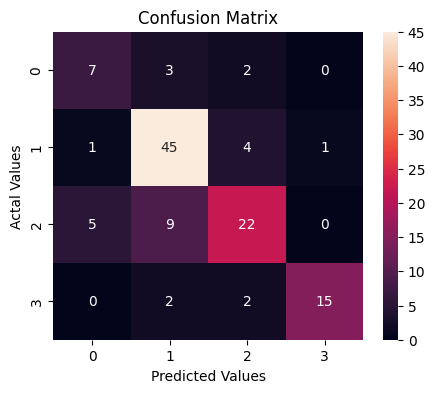

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

<h1> Evaluation </h1>

In [42]:
from sklearn.metrics import accuracy_score
import pickle

In [43]:
for algo, model in fit_models.items():
    yhat = model.predict(x_test)
    print(algo, accuracy_score(y_test, yhat))

LR 0.6949152542372882
RC 0.6949152542372882
RFC 0.7542372881355932
GBC 0.6949152542372882
KNN 0.6949152542372882


c:\Users\ljuli\anaconda3\envs\MediaPipe\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\ljuli\anaconda3\envs\MediaPipe\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\ljuli\anaconda3\envs\MediaPipe\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\ljuli\anaconda3\envs\MediaPipe\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\ljuli\anaconda3\envs\MediaPipe\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [44]:
# with open('modelv01.pkl', 'wb') as f:
#     pickle.dump(fit_models['RFC'], f)

<h1> Using model </h1>